<a href="https://colab.research.google.com/github/agusekominarno/imageretrieval/blob/main/histogram/hi_color_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from imutils.perspective import four_point_transform
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [2]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [190]:
def find_color_card(image):
	# load the ArUCo dictionary, grab the ArUCo parameters, and
	# detect the markers in the input image
	arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
	arucoParams = cv2.aruco.DetectorParameters_create()
	(corners, ids, rejected) = cv2.aruco.detectMarkers(image,
		arucoDict, parameters=arucoParams)
 
	print('arucoDict : ',arucoDict)
	print('arucoParams : ',arucoParams)
	print('ids : ', ids)
	print('corners : ', corners)
	print('rejected : ', rejected)
	# try to extract the coordinates of the color correction card
	try:
		# otherwise, we've found the four ArUco markers, so we can
		# continue by flattening the ArUco IDs list
		ids = ids.flatten()
		print('ids : ', ids)

		# extract the top-left marker
		i = np.squeeze(np.where(ids == 923))
		topLeft = np.squeeze(corners[i])[0]
		print('i1 :', i, '; topLeft :', topLeft)

		# extract the top-right marker
		i = np.squeeze(np.where(ids == 1001))
		topRight = np.squeeze(corners[i])[1]
		print('i2 :', i, '; topRight :', topRight)


		# extract the bottom-right marker
		i = np.squeeze(np.where(ids == 241))
		bottomRight = np.squeeze(corners[i])[2]
		print('i3 :', i, '; bottonRight :', bottomRight)

		# extract the bottom-left marker
		i = np.squeeze(np.where(ids == 1007))
		bottomLeft = np.squeeze(corners[i])[3]
		print('i4 :', i, '; bottomLeft :', bottomLeft)

	# we could not find color correction card, so gracefully return
	except:
		print('Gagal')
		return None

	# build our list of reference points and apply a perspective
	# transform to obtain a top-down, birds-eye-view of the color
	# matching card
	cardCoords = np.array([topLeft, topRight,
		bottomRight, bottomLeft])
	card = four_point_transform(image, cardCoords)

	# return the color matching card to the calling function
	return card

In [226]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "reference": "c1.webp",
    "input": "gambar5.png"
}

[INFO] loading images...


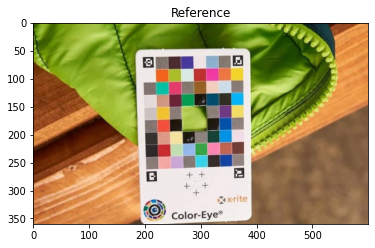

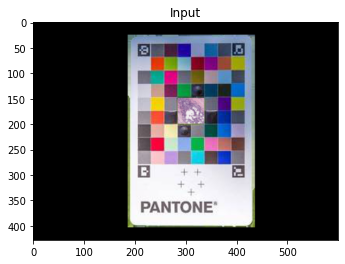

In [227]:
# load the reference image and input images from disk
print("[INFO] loading images...")
ref = cv2.imread(args["reference"])
image = cv2.imread(args["input"])

# resize the reference and input images
ref = imutils.resize(ref, width=600)
image = imutils.resize(image, width=600)

# display the reference and input images to our screen
plt_imshow("Reference", ref)
plt_imshow("Input", image)

In [228]:
# find the color matching card in each image
print("[INFO] finding color matching cards...")
refCard = find_color_card(ref)
imageCard = find_color_card(image)

# if the color matching card is not found in either the reference
# image or the input image, gracefully exit
if refCard is None or imageCard is None:
	print("[INFO] could not find color matching card in both images")

[INFO] finding color matching cards...
arucoDict :  <aruco_Dictionary 0x7f2c0a4fd730>
arucoParams :  <aruco_DetectorParameters 0x7f2c07bfda10>
ids :  [[1007]
 [ 241]
 [ 923]
 [1001]]
corners :  [array([[[203., 266.],
        [221., 265.],
        [221., 283.],
        [203., 283.]]], dtype=float32), array([[[360., 260.],
        [377., 259.],
        [378., 276.],
        [360., 277.]]], dtype=float32), array([[[196.,  61.],
        [215.,  61.],
        [215.,  79.],
        [197.,  80.]]], dtype=float32), array([[[357.,  59.],
        [375.,  58.],
        [376.,  76.],
        [358.,  76.]]], dtype=float32)]
rejected :  [array([[[333., 236.],
        [334., 256.],
        [313., 257.],
        [313., 237.]]], dtype=float32), array([[[335., 236.],
        [355., 236.],
        [356., 255.],
        [336., 256.]]], dtype=float32), array([[[311., 215.],
        [311., 235.],
        [291., 236.],
        [291., 216.]]], dtype=float32), array([[[357., 214.],
        [377., 213.],
      

In [229]:
print(refCard)

[[[185 187 192]
  [ 92  95  99]
  [ 86  89  93]
  ...
  [ 69  72  76]
  [ 53  56  61]
  [ 86  90  94]]

 [[168 171 176]
  [ 35  38  42]
  [ 33  36  40]
  ...
  [ 34  37  41]
  [ 34  37  41]
  [ 45  48  52]]

 [[174 178 182]
  [ 50  54  58]
  [ 37  40  44]
  ...
  [ 44  47  51]
  [ 42  45  49]
  [ 51  55  59]]

 ...

 [[158 158 165]
  [ 36  36  43]
  [ 41  41  47]
  ...
  [ 59  59  65]
  [ 36  36  42]
  [156 156 164]]

 [[169 169 176]
  [ 30  30  37]
  [ 41  41  48]
  ...
  [ 49  49  55]
  [ 42  42  49]
  [164 164 170]]

 [[184 184 191]
  [ 47  47  53]
  [ 61  61  68]
  ...
  [ 70  70  77]
  [ 68  68  74]
  [182 182 189]]]


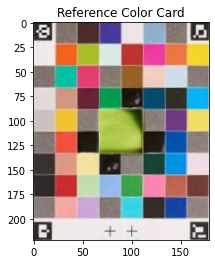

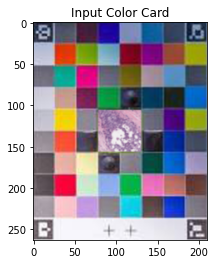

[INFO] matching images...


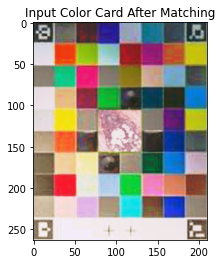

In [230]:
# show the color matching card in the reference image and input image,
# respectively
plt_imshow("Reference Color Card", refCard)
plt_imshow("Input Color Card", imageCard)

# apply histogram matching from the color matching card in the
# reference image to the color matching card in the input image
print("[INFO] matching images...")
imageCard = exposure.match_histograms(imageCard, refCard,
	multichannel=True)

# show our input color matching card after histogram matching
plt_imshow("Input Color Card After Matching", imageCard)